<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/4_4_stats_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nolds
!pip install hurst
!pip install pmdarima
!pip install tsfresh
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 8.0 MB/s eta 0:00:00


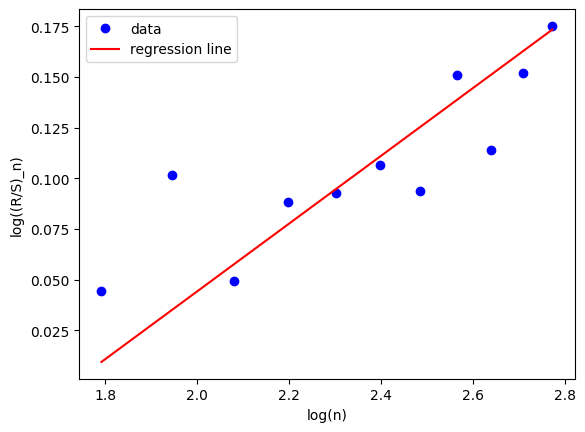

Hurst exponent: 0.6673095676503297


In [2]:
# !pip install nolds
import numpy as np
import nolds
np.random.seed(1)
# time_series = np.random.normal(0, 1, 100)

time_series = [0.29875031, 0.25506379, 0.75053665, 0.99802279, 0.53397792,
       0.94420272, 0.39661011, 0.10668245, 0.40877383, 0.29612777,
       0.49340696, 0.65704368, 0.46105022, 0.93516051, 0.88476482,
       0.7019776 , 0.48968491, 0.13168728, 0.39701367, 0.70440154,
       0.28488552, 0.10398808, 0.90789846, 0.70905081, 0.61527643,
       0.79249891, 0.83564604, 0.483459  , 0.88118825, 0.91641901,
       0.2715511 , 0.60754536, 0.52658403, 0.53794578, 0.93766309,
       0.3051887 , 0.98343398, 0.90213121, 0.45872289, 0.81745326,
       0.76904699, 0.67789497, 0.31983389, 0.19645099, 0.6715277 ,
       0.8429733 , 0.01625279, 0.64280338, 0.44287302, 0.89808776,
       0.32147293, 0.47418481, 0.5147671 , 0.14043952, 0.7128923 ,
       0.83047635, 0.05790928, 0.29138882, 0.03804468, 0.9565441 ,
       0.66716882, 0.96420042, 0.53149428, 0.80206852, 0.37441398,
       0.35381903, 0.37826782, 0.65786213, 0.35945315, 0.90036745,
       0.98327487, 0.03042652, 0.19362329, 0.11224999, 0.04236405,
       0.22774099, 0.44679332, 0.83699037, 0.22182403, 0.49394526,
       0.92961874, 0.66721471, 0.79807902, 0.55099397, 0.98046646,
       0.58866215, 0.04551071, 0.1979828 , 0.40477363, 0.60127717,
       0.77193087, 0.41308613, 0.71005831, 0.7898695 , 0.3172602 ,
       0.97927024, 0.6496565 , 0.88099806, 0.55593769, 0.74160311]

# Вычисление коэффициента Херста
H = nolds.hurst_rs(time_series,debug_plot=True)

print(f"Hurst exponent: {H}")

1. coef_hurst -

Коэффициент Херста показывает, насколько "предсказуемым" или "непредсказуемым" является временной ряд на долгом временном промежутке. Если коэффициент близок к 0.5, это означает, что временной ряд ведет себя как случайное блуждание без долгосрочных закономерностей. Если коэффициент больше 0.5, это указывает на то, что в ряде есть долгосрочные тенденции или циклы.

оценил показатель Херста K с использованием подхода с измененным масштабом диапазона (если K = 0,5, в данных отсутствуют дальнодействующие корреляции, если K < 0,5, имеются отрицательные дальнодействующие корреляции, если K > 0,5, имеются положительные дальнодействующие корреляции)


https://www.youtube.com/watch?v=LCUC1e4MmZU

https://cschoel.github.io/nolds/nolds.html#hurst-exponent


In [3]:
import numpy as np
from scipy.fft import fft
from scipy.stats import entropy


# Частота дискретизации
fs = 1

# Вычисление дискретного преобразования Фурье
X = fft(time_series)
amplitude_spectrum = 2 / len(time_series) * np.abs(X[:len(time_series) // 2])

# Нормализация амплитудного спектра
amplitude_spectrum_norm = amplitude_spectrum / amplitude_spectrum.sum()

# Вычисление энтропии Шеннона амплитудного спектра
spectral_entropy = entropy(amplitude_spectrum_norm, base=2)

print(f"Spectral entropy (FFT method): {spectral_entropy}")

Spectral entropy (FFT method): 4.559323819556204


In [4]:
import numpy as np
from scipy.stats import entropy



# Вычисляем энтропию вашего временного ряда
unique_values, counts = np.unique(time_series, return_counts=True)
probs = counts / len(time_series)
entropy_value = entropy(probs, base=2)

# Ожидаемая энтропия для нормального распределения
std_dev = np.std(time_series)
expected_entropy = 0.5 * np.log2(2 * np.pi * np.e * std_dev**2)

print("Энтропия вашего временного ряда:", entropy_value)
print("Ожидаемая энтропия для нормального распределения с std dev", std_dev, ":", expected_entropy)

Энтропия вашего временного ряда: 6.643856189774725
Ожидаемая энтропия для нормального распределения с std dev 0.2815959168311841 : 0.2187939051984962


2. feat_spectral -

Спектральная энтропия (Шеннона) представляет собой меру разнообразия или хаоса в спектре мощности временного ряда. Чем выше значение спектральной энтропии, тем более сложный или разнообразный спектр мощности временного ряда.

Расшифровать спектральную энтропию можно следующим образом:

Низкое значение спектральной энтропии (близкое к 0) может указывать на то, что спектр мощности временного ряда содержит основные частоты, что может свидетельствовать о более упорядоченной или предсказуемой структуре временного ряда.
Высокое значение спектральной энтропии (больше 1) может указывать на более сложный или разнообразный спектр мощности временного ряда, что может указывать на более хаотическую или менее предсказуемую структуру временного ряда.

https://www.youtube.com/watch?v=YtebGVx-Fxw

https://www.youtube.com/watch?v=xQov3gvDKK8

In [5]:
from statsmodels.stats.diagnostic import acorr_ljungbox
box_pierce = acorr_ljungbox(time_series,boxpierce=True)
box_pierce['result'] = box_pierce.apply(lambda row: 'белый шум' if row['lb_pvalue'] >= 0.05 and row['bp_pvalue'] >= 0.05 else 'не белый шум', axis=1)
print(box_pierce)

     lb_stat  lb_pvalue   bp_stat  bp_pvalue     result
1   1.089079   0.296675  1.057047   0.303890  белый шум
2   1.098580   0.577360  1.066176   0.586790  белый шум
3   1.116556   0.773079  1.083271   0.781114  белый шум
4   2.480570   0.648118  2.367049   0.668590  белый шум
5   3.686123   0.595430  3.489868   0.624921  белый шум
6   5.755178   0.451166  5.396644   0.494036  белый шум
7   6.044556   0.534557  5.660488   0.579903  белый шум
8   6.813444   0.556888  6.353995   0.607644  белый шум
9   7.591190   0.575810  7.047867   0.632136  белый шум
10  8.613544   0.569129  7.949944   0.633726  белый шум


3. box_pierce +

Статистика Бокса-Пирса используется для проверки гипотезы о том, является ли временной ряд случайным шумом (белым шумом) или содержит значимую автокорреляцию. Это позволяет оценить, насколько случайными или предсказуемыми являются значения временного ряда.

Путем вычисления статистики Бокса-Пирса и соответствующего p-значения можно определить, существует ли значимая автокорреляция в ряде на различных лагах. Если p-значение меньше уровня значимости (например, 0.05), это может указывать на то, что ряд не является белым шумом и содержит автокорреляцию.

4. ljung_box +

Статистика Юнга-Бокса используется для проверки гипотезы о том, является ли временной ряд случайным шумом (белым шумом) или содержит значимую автокорреляцию. Это инструмент для оценки случайности или предсказуемости значений временного ряда.

 если p-значение, полученное при использовании статистики Юнга-Бокса, больше выбранного уровня значимости (например, 0.05), то нет оснований отвергать нулевую гипотезу о том, что ряд является белым шумом.


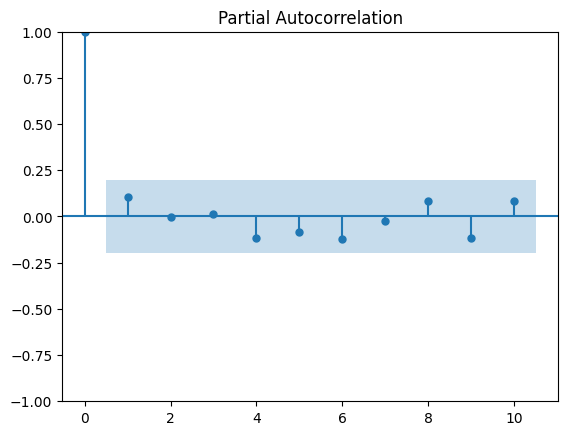

Partial Autocorrelation Function (PACF): 
 [ 1.          0.1038513  -0.00104698  0.01271161 -0.1220595  -0.08890459
 -0.13076023 -0.02685674  0.09172844 -0.1302993   0.09470887]


In [6]:
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Вычисление частичной автокорреляции
pacf = sm.tsa.stattools.pacf(time_series, nlags=10)

# Визуализация частичной автокорреляции
plot_pacf(time_series, lags=10)
plt.show()

print(f"Partial Autocorrelation Function (PACF): \n {pacf}")

5. feat_pacf +

Частичная автокорреляция (PACF) - это мера автокорреляции между значениями временного ряда после того, как были удалены влияния корреляций на более коротких задержках. Она позволяет определить прямую зависимость между значением ряда в момент времени t и его значениями в прошлом, учитывая влияние промежуточных значений временного ряда. PACF часто используется для определения порядка авторегрессионной модели (AR) в анализе временных рядов.




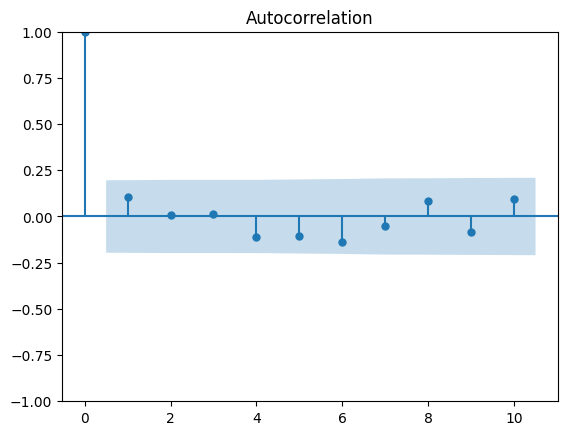

Autocorrelation Function (ACF): 
 [ 1.          0.10281278  0.00955442  0.01307494 -0.11330392 -0.10596315
 -0.13808606 -0.05136577  0.08327709 -0.08329894  0.09497774]


In [7]:
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Вычисление полной автокорреляции
acf = sm.tsa.stattools.acf(time_series, nlags=10)

# Визуализация полной автокорреляции
plot_acf(time_series, lags=10)
plt.show()

print(f"Autocorrelation Function (ACF): \n {acf}")

Полная автокорреляция (ACF) для временного ряда показывает корреляцию между значениями ряда на разных задержках (лагах), учитывая влияние всех промежуточных значений между этими лагами.

Когда мы говорим о частичной автокорреляции (PACF), мы пытаемся измерить связь между значениями временного ряда на разных лагах, но с учетом промежуточных значений между этими лагами. Другими словами, PACF отображает автокорреляцию между значениями временного ряда на разных лагах, но после того, как были удалены влияния корреляций на более коротких задержках.

Давайте представим, что у нас есть временной ряд температуры каждый час. Если мы хотим узнать, есть ли зависимость между температурой в 6 утра и в 18 вечера, мы можем посмотреть на частичную автокорреляцию на лаге 12 (так как 18-6 = 12), учитывая при этом влияние промежуточных значений температуры в другие часы дня.

Таким образом, PACF позволяет нам определить прямую зависимость между значениями временного ряда на различных моментах времени, учитывая при этом влияние промежуточных значений временного ряда.

In [8]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss


print('Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)')
#KPSS
kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')
# check p-value against significance level
if p_value < 0.05:
    print('I По p-value, ряд НЕ стационарен метод KPSS')
else:
    print('I По p-value, ряд стационарен метод KPSS')

# check KPSS statistic against critical value

if abs(kpss_stat) > abs(max(crit.values())):
    print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
else:
    print('II По значению KPSS статистики, ряд стационарен метод KPSS')
print()
print('kpss_stat', kpss_stat)
print('p_value', p_value)
print('lags', lags)
print('crit', crit)

Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.0718974382886864
p_value 0.1
lags 1
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


<ipython-input-8-50170cd305df>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


6. unitroot_kpss +

Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test) используется для проверки, является ли временной ряд стационарным. Этот тест основан на проверке гипотезы о наличии единичного корня в ряде (нестационарности). Если значение статистики теста меньше критического значения, то нулевая гипотеза о наличии единичного корня отвергается, что указывает на стационарность ряда.


Стационарный временной ряд обладает следующими признаками:

Постоянное среднее значение: среднее значение ряда остается постоянным во времени.
Постоянная вариация: дисперсия ряда остается постоянной во времени.
Постоянная автоковариация: автоковариация между значениями ряда на разных задержках (лагах) остается постоянной во времени.
Стационарность ряда важна для многих методов анализа временных рядов, поскольку многие модели и методы предполагают стационарность данных.

это линейные вычисления


Всегда лучше применять оба теста, чтобы гарантировать, что серия действительно стационарна. Возможные результаты применения этих стационарных тестов следующие:

Случай 1: Оба теста показывают, что серия не является стационарной - серия не является стационарной
Случай 2: Оба теста показывают, что серия стационарна - серия стационарна
Пример 3: KPSS указывает на стационарность, а ADF указывает на нестационарность - ряд является стационарным по тренду. Тренд необходимо удалить, чтобы сделать ряд строго стационарным. Отклоненный от тренда ряд проверяется на стационарность.
Случай 4: KPSS указывает на нестационарность, а ADF указывает на стационарность - ряд является стационарным по разности. Для обеспечения стационарности ряда необходимо использовать дифференцирование. Разностный ряд проверяется на стационарность.
Здесь, из-за разницы в результатах теста ADF и теста KPSS, можно сделать вывод, что ряд является трендовым, а не строго стационарным. Серия может быть детерминирована путем дифференцирования или подбора модели.

In [9]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

print('Тест на стационарность Дики-Фуллера (Dickey-Fuller test')
adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(time_series,regression='ct')
print()
print('kpss_stat', adf)
print('pvalue', pvalue)
print('usedlag', usedlag)
print('nobs', nobs)
print('critical_values', critical_values)

print('Results of Dickey-Fuller Test:')

if pvalue <= 0.05:
    print('I По p-value, ряд стационарен метод ADF')
else:
    print('I По p-value, ряд НЕ стационарен метод ADF')

# check ADF statistic against critical value
if abs(adf) > abs(max(critical_values.values())):
    print('II По значению ADF статистики, ряд стационарен, метод ADF' )
else:
    print('II По значению ADF статистики, ряд НЕ стационарен, метод ADF')
# print('resstore', resstore)

print()


Тест на стационарность Дики-Фуллера (Dickey-Fuller test

kpss_stat -8.855541911646206
pvalue 7.715135910821488e-13
usedlag 0
nobs 99
critical_values {'1%': -4.053254236405479, '5%': -3.455806184392646, '10%': -3.1535907061122397}
Results of Dickey-Fuller Test:
I По p-value, ряд стационарен метод ADF
II По значению ADF статистики, ряд стационарен, метод ADF



7. unitroot_pp + метод ADF и метод  PhillipsPerron эквиваленты друг другу с некоторой оговоренностью

Тест Филлипса-Перрона (ADF) используется для проверки наличия единичного корня во временном ряде, что указывает на нестационарность ряда. Если значение статистики ADF меньше критического значения и p-значение меньше уровня значимости, то нулевая гипотеза о наличии единичного корня отвергается, что указывает на стационарность ряда.



Тест Филлипса-Перрона (ADF) и Тест на стационарность КПСС (KPSS) имеют различные цели и подходы к проверке стационарности временного ряда.

Тест Филлипса-Перрона (ADF) используется для проверки наличия единичного корня во временном ряде, что указывает на нестационарность ряда. Он тестирует нулевую гипотезу о наличии единичного корня в ряде.
Тест на стационарность КПСС (KPSS) используется для проверки, является ли временной ряд стационарным. Он тестирует нулевую гипотезу о стационарности ряда против альтернативной гипотезы о наличии единичного корня или детерминированного тренда в ряде.
Таким образом, ADF и KPSS тестируют разные аспекты стационарности временного ряда: ADF фокусируется на наличии единичного корня, в то время как KPSS фокусируется на общей стационарности ряда.


Всегда лучше применять оба теста, чтобы гарантировать, что серия действительно стационарна. Возможные результаты применения этих стационарных тестов следующие:

Случай 1: Оба теста показывают, что серия не является стационарной - серия не является стационарной
Случай 2: Оба теста показывают, что серия стационарна - серия стационарна
Пример 3: KPSS указывает на стационарность, а ADF указывает на нестационарность - ряд является стационарным по тренду. Тренд необходимо удалить, чтобы сделать ряд строго стационарным. Отклоненный от тренда ряд проверяется на стационарность.
Случай 4: KPSS указывает на нестационарность, а ADF указывает на стационарность - ряд является стационарным по разности. Для обеспечения стационарности ряда необходимо использовать дифференцирование. Разностный ряд проверяется на стационарность.
Здесь, из-за разницы в результатах теста ADF и теста KPSS, можно сделать вывод, что ряд является трендовым, а не строго стационарным. Серия может быть детерминирована путем дифференцирования или подбора модели.



In [26]:
from arch.unitroot import PhillipsPerron


# Проведение теста Филлипса-Перрона
pp = PhillipsPerron(time_series,trend='ct')
print(pp.summary().as_text())
print()

if pp.pvalue > 0.05:
    print("По p-value, ряд НЕ стационарен методом Phillips-Perron")
else:
    print("По p-value, ряд стационарен методом Phillips-Perron")


     Phillips-Perron Test (Z-tau)    
Test Statistic                 -8.829
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.05 (1%), -3.46 (5%), -3.15 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

По p-value, ряд стационарен методом Phillips-Perron


7. unitroot_pp + метод PhillipsPerron

Тесты Дики-Фуллера (ADF – Augmented Dickey-Fuller) и Филлипса-Перрона (PP – Phillips-Perron) предназначены для проверки стационарности временного ряда, но они используют разные подходы для учета автокорреляции и гетероскедастичности в ошибках:

Автокорреляция:

ADF: Тест ADF расширяет базовый тест Дики-Фуллера путем включения лагов исследуемой переменной для коррекции автокорреляции. Количество лагов может быть выбрано вручную или определено по какому-либо информационному критерию (например, AIC или BIC).
PP: Тест PP учитывает автокорреляцию, не требуя включения лагов. Вместо этого он использует непараметрический метод для коррекции тестовой статистики, который делает его более устойчивым к спецификации модели и позволяет обойтись без предварительного выбора количества лагов.

Гетероскедастичность:

ADF: Тест ADF не корректирует тестовую статистику на гетероскедастичность напрямую, и если она присутствует, это может повлиять на результаты теста.
PP: Тест PP корректирует тестовую статистику на наличие гетероскедастичности, что делает его более надежным в присутствии гетероскедастичных ошибок.

Чувствительность к размеру выборки:

ADF: Тест ADF может быть чувствителен к размеру выборки, так как выбор количества лагов может зависеть от размера выборки.
PP: Тест PP, благодаря своим непараметрическим коррекциям, часто считается более устойчивым при различных размерах выборки.

Оба теста имеют свои преимущества и недостатки, и выбор между ними зависит от характеристик конкретного временного ряда и предположений исследователя. В некоторых случаях исследователи могут применять оба теста для устойчивости своих результатов.

https://arch.readthedocs.io/en/latest/unitroot/unitroot_examples.html

In [11]:
from pmdarima.arima.utils import ndiffs
import pandas as pd


n_diffs = ndiffs(time_series, test='kpss')

print("ndiffs нужно ли делать дифференцацию:", n_diffs)


ndiffs нужно ли делать дифференцацию: 0


8. unitroot_ndiffs +

Метод ndiffs из библиотеки pmdarima используется для автоматического определения оптимального количества различий, необходимых для стационарности временного ряда перед применением модели ARIMA.

Когда вы используете ndiffs с параметром test='kpss', метод будет проводить тест на стационарность с использованием KPSS (Kwiatkowski-Phillips-Schmidt-Shin) теста. Результатом будет количество различий, необходимых для стационарности ряда.

Если значение n_diffs равно 0, это означает, что временной ряд уже стационарен и дополнительные различия не требуются. Если значение n_diffs равно 1, это означает, что для стационарности ряда требуется одно различие.

Таким образом, результат n_diffs позволяет определить оптимальное количество различий для стационарности временного ряда перед построением модели ARIMA.


In [12]:
from pmdarima.arima.utils import nsdiffs
import pandas as pd

# Определение количества сезонных разностей
n_seasonal_diffs = nsdiffs(time_series,m=4)

print("nsdiffs Сколько diff надо применить к данным:", n_seasonal_diffs)



nsdiffs Сколько diff надо применить к данным: 0


9. unitroot_nsdiffs +

указывает количество сезонных различий, необходимых для стационарности ряда.

In [13]:
import numpy as np

def var_tiled_mean(time_series, size=None, period=0):
    if size is None:
        size = 10 if period == 1 else period
    # Масштабирование входного временного ряда
    time_series_scaled = (time_series - np.mean(time_series)) / np.std(time_series)
    # Вычисление скользящего среднего
    meanx = [np.mean(time_series_scaled[i:i+size]) for i in range(0, len(time_series_scaled) - size + 1)]
    # Вычисление дисперсии скользящих средних
    stability = np.var(meanx) if len(time_series_scaled) >= 2 * size else 0
    return stability

 # Пример временного ряда
result = var_tiled_mean(time_series, size=6)
print(result)

0.18218390617844413


10. var_tiled_mean -

приведены отклонения "плиточных средних” (т.Е. Средних значений последовательных неперекрывающихся блоков наблюдений). Длина плитки по умолчанию равна либо 10 (для несезонных данных), либо длине сезонного периода. Это иногда называют функцией “стабильности”.

In [14]:
import numpy as np
import pandas as pd

def var_tiled_var(x, size=None, period=1):
    if size is None:
        size = 10 if period == 1 else period

    # Масштабирование данных
    x_scaled = (x - np.mean(x)) / np.std(x)
    x_series = pd.Series(x_scaled)

    # Вычисление дисперсии в скользящем окне
    varx = x_series.rolling(window=size).var(ddof=0).dropna()[::size]

    # Вычисление дисперсии дисперсий
    if len(x_scaled) < 2 * size:
        lumpiness = 0
    else:
        lumpiness = varx.var(ddof=1)

    return lumpiness


result = var_tiled_var(time_series, size=6)
print(result)

0.1499141734468587


11. var_tiled_var -

приведены отклонения "плиточных отклонений” (т. Е. Отклонения последовательных неперекрывающихся блоков наблюдений). Иногда это называют признаком “комковатости”.

In [15]:
import numpy as np
import pandas as pd

def max_shift_level(x, size=None, period=1):
    if size is None:
        size = 10 if period == 1 else period

    # Создаем Series из pandas для использования скользящего окна
    x_series = pd.Series(x)

    # Вычисляем скользящее среднее
    rollmean = x_series.rolling(window=size, min_periods=1).mean()

    # Вычисляем абсолютные разности скользящих средних
    means = np.abs(np.diff(rollmean, n=size - 1))

    # Находим наибольшее значение среднего сдвига и индекс
    if len(means) == 0:
        maxmeans = 0
        maxidx = np.nan
    elif np.all(np.isnan(means)):
        maxmeans = np.nan
        maxidx = np.nan
    else:
        maxmeans = np.nanmax(means)
        maxidx = np.nanargmax(means) + 1

    return {'shift_level_max': maxmeans, 'shift_level_index': maxidx}

# Пример использования функции

size = 6  # Размер скользящего окна
result = max_shift_level(time_series, size=size)
print(result)

{'shift_level_max': 1.156223193333334, 'shift_level_index': 57}


12. shift_level_max -

 находит наибольший средний сдвиг между двумя последовательными скользящими окнами временного ряда. Это полезно для обнаружения внезапных скачков или падений во временном ряду.

shift_level_index  -

указывает индекс, при котором происходит наибольший средний сдвиг.

In [16]:
import numpy as np
import pandas as pd

def max_shift_var(x, size=None, period=1):
    if size is None:
        size = 10 if period == 1 else period

    # Create a pandas Series for the rolling operation
    x_series = pd.Series(x)

    # Compute rolling variance
    rollvar = x_series.rolling(window=size, min_periods=1).var(ddof=0)

    # Compute absolute differences of the rolling variances
    vars_diff = np.abs(np.diff(rollvar, n=size - 1))

    # Determine the maximum variance shift and its index
    if len(vars_diff) == 0:
        maxvar = 0
        maxidx = np.nan  # Using np.nan for NA_real_ equivalent
    elif np.all(np.isnan(vars_diff)):
        maxvar = np.nan
        maxidx = np.nan
    else:
        maxvar = np.nanmax(vars_diff)
        maxidx = np.nanargmax(vars_diff) + 1

    return {'shift_var_max': maxvar, 'shift_var_index': maxidx}


result = max_shift_var(time_series, size=6)
print(result)

{'shift_var_max': 0.6058956369771634, 'shift_var_index': 75}


13. shift_var_max -

 находит наибольший сдвиг дисперсии между двумя последовательными скользящими окнами временного ряда. Это полезно для обнаружения внезапных изменений волатильности временного ряда.

shift_var_index -

 указывает индекс, при котором происходит наибольший сдвиг дисперсии.

In [17]:
import numpy as np
from scipy.stats import entropy

def kl_divergence(p, q):
    # Очистка от нулевых значений для избежания деления на ноль
    p = p[p > 0]
    q = q[q > 0]
    return entropy(p, q)

def max_kl_shift(time_series, window_size):
    # Нормализация временного ряда для получения распределения вероятностей
    hist_window = lambda window: np.histogram(window, bins='auto', density=True)[0]

    # Вычисление распределения для каждого скользящего окна
    dists = np.array([hist_window(time_series[i:i+window_size]) for i in range(len(time_series) - window_size + 1)])

    # Вычисление расхождения Кульбака-Лейблера между последовательными окнами
    kl_shifts = np.array([kl_divergence(dists[i], dists[i+1]) for i in range(len(dists) - 1)])

    # Поиск максимального сдвига и его индекса
    max_shift = np.max(kl_shifts) if len(kl_shifts) > 0 else 0
    max_shift_index = np.argmax(kl_shifts) + 1 if len(kl_shifts) > 0 else None

    return max_shift, max_shift_index


window_size = 2

max_shift, max_shift_index = max_kl_shift(time_series, window_size)
print("Max KL Divergence Shift:", max_shift)
print("At index:", max_shift_index)

Max KL Divergence Shift: 2.220446049250324e-16
At index: 37


14. shift_kl_max -

 находит наибольший сдвиг распределения (на основе расхождения Кульбака-Лейблера) между двумя последовательными скользящими окнами временного ряда. Это полезно для обнаружения внезапных изменений в распределении временного ряда.

shift_kl_index -  

указывает индекс, при котором происходит наибольший сдвиг KL.

In [18]:
import numpy as np

def n_crossing_points(time_series):
    # Вычисление медианы временного ряда
    median_value = np.median(time_series)

    # Создание массива, где True, если элемент больше медианы
    above_median = time_series > median_value

    # Вычисление пересечений: смены значения с True на False и наоборот
    cross_points = np.diff(above_median) != 0

    # Возвращаем количество пересечений
    return np.sum(cross_points)


print("Number of crossing points:", n_crossing_points(time_series))

Number of crossing points: 49


15. n_crossing_points

 вычисляет количество раз, когда временной ряд пересекает медиану

Number of crossing points: 49


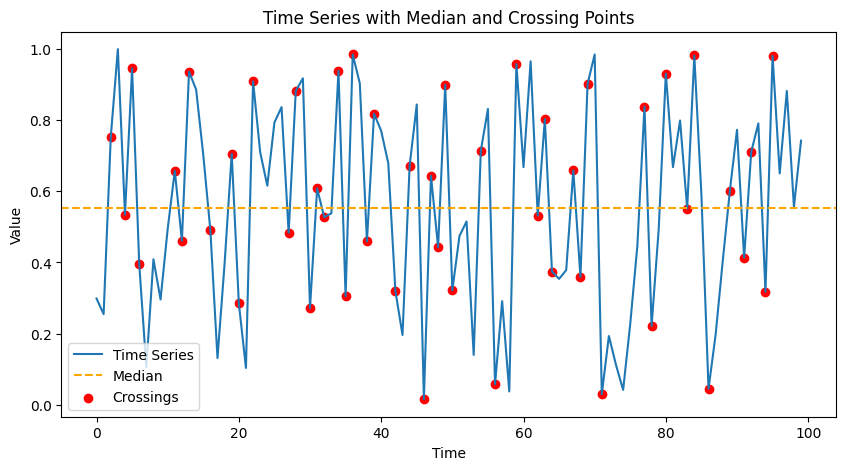

49

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_time_series_with_median_crossings(time_series):
    median_value = np.median(time_series)  # Вычисление медианы
    above_median = time_series > median_value  # Булев массив для значений выше медианы
    cross_points = np.diff(above_median) != 0  # Булев массив для точек пересечения медианы

    # Находим индексы, где происходит пересечение медианы
    crossing_indices = np.where(cross_points)[0] + 1

    # Визуализация временного ряда
    plt.figure(figsize=(10, 5))
    plt.plot(time_series, label='Time Series')

    # Визуализация медианы
    plt.axhline(median_value, color='orange', linestyle='--', label='Median')

    # Визуализация точек пересечения медианы
    plt.scatter(crossing_indices, time_series[crossing_indices], color='red', label='Crossings')

    # Добавление легенды и заголовка
    plt.legend()
    plt.title('Time Series with Median and Crossing Points')
    plt.xlabel('Time')
    plt.ylabel('Value')

    # Отображение графика
    plt.show()
     # Возвращаем количество пересечений
    return np.sum(cross_points)


print("Number of crossing points:", n_crossing_points(time_series))

# Пример использования функции
time_series_arr = np.array(time_series)
plot_time_series_with_median_crossings(time_series_arr)

In [20]:
import numpy as np

def rle_encode(x):
    """Run-length encoding."""
    n = len(x)
    if n == 0:
        return (np.array([], dtype=int), np.array([], dtype=int))

    ends = np.nonzero(x[:-1] != x[1:])[0] + 1
    ends = np.concatenate(([0], ends))  # start indices
    lengths = np.diff(np.concatenate((ends, [n])))
    values = x[ends]

    return values, lengths

def longest_flat_spot(x, num_bins=10):
    # Разбиение данных на бины
    bins = np.linspace(np.min(x), np.max(x), num_bins)
    # Возвращает индексы бинов к которым относится каждое значение в x
    digitized = np.digitize(x, bins, right=True)
    # Run-length encoding
    _, lengths = rle_encode(digitized)
    # Максимальная длина плоского участка
    longest_spot = np.max(lengths)

    return {'longest_flat_spot': longest_spot}

# Пример использования функции
x_1 = np.array(time_series)
result = longest_flat_spot(x_1)
print(result)

{'longest_flat_spot': 3}


16. longest_flat_spot

вычисляет количество разделов данных, в которых ряд относительно неизменен.

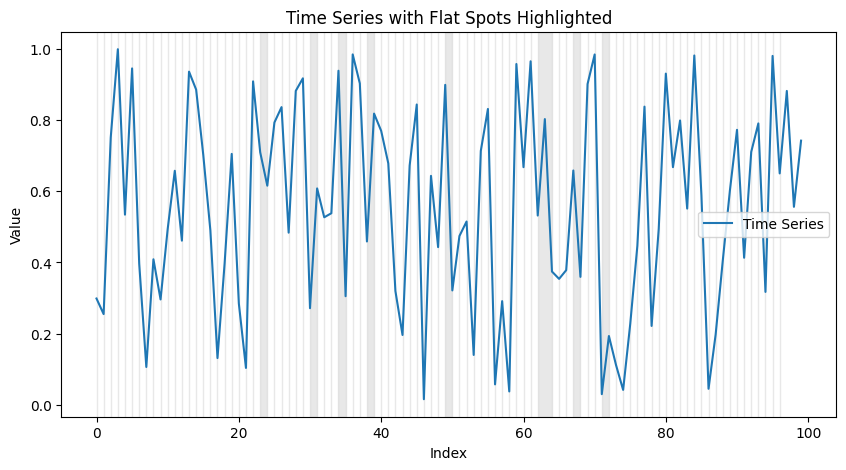

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def rle_encode(x):
    """Run-length encoding."""
    # Пустая последовательность
    if len(x) == 0:
        return np.array([]), np.array([])
    else:
        # Начала и концы участков
        starts_ends = np.flatnonzero(np.diff(x, prepend=x[0], append=x[-1]))
        lengths = np.diff(starts_ends)  # Длины участков
        values = x[starts_ends[:-1]]  # Значения участков
        return values, lengths

def plot_time_series_with_flat_spots(x, num_bins=10):
    # Разбиение данных на бины
    bins = np.linspace(np.min(x), np.max(x), num_bins)
    # Классификация данных по бинам
    digitized = np.digitize(x, bins, right=True)
    # Run-length encoding
    values, lengths = rle_encode(digitized)

    # Построение графика временного ряда
    plt.figure(figsize=(10, 5))
    plt.plot(x, label='Time Series', zorder=1)

    # Подсветка участков плоскости
    start_index = 0
    for value, length in zip(values, lengths):
        end_index = start_index + length
        plt.axvspan(start_index, end_index-1, color='lightgrey', alpha=0.5, zorder=0)
        start_index = end_index

    # Добавление легенды и заголовка
    plt.title('Time Series with Flat Spots Highlighted')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

    # Отображение графика
    plt.show()

# Пример использования функции
x = np.array(time_series)
plot_time_series_with_flat_spots(x)

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression

def calculate_arch_lm(x, lags=12, demean=True):
    if len(x) <= lags + 1:
        return {'arch_lm': np.nan}

    if demean:
        x = x - np.mean(x, axis=0, where=~np.isnan(x))

    mat = np.vstack([np.roll(x**2, i) for i in range(lags+1)]).T
    X = mat[:, :-1]
    y = mat[:, -1]

    fit = LinearRegression().fit(X, y.reshape(-1, 1))
    stat_arch_lm = fit.score(X, y)
    stat_arch_lm = 1 if np.isnan(stat_arch_lm) else stat_arch_lm

    return {'stat_arch_lm': stat_arch_lm}

# Пример использования функции
x = np.array(time_series)
result = calculate_arch_lm(x)
print(result)

{'stat_arch_lm': 0.1342780154574087}


17. stat_arch_lm -

возвращает статистику на основе критерия множителя Лагранжа (LM) Энгла (1982) для авторегрессионной условной гетероскедастичности (ARCH).

Таким образом, если результат stat_arch_lm равен 1, это может указывать на отсутствие авторегрессионной условной гетероскедастичности в данных. Если значение отлично от 1, то это может указывать на наличие авторегрессионной условной гетероскедастичности в модели временного ряда.


Статистика на основе критерия множителя Лагранжа (LM) Энгла (1982) для авторегрессионной условной гетероскедастичности (ARCH) используется для проверки наличия авторегрессионной условной гетероскедастичности в остатках модели временного ряда.

Более конкретно, статистика LM-теста для ARCH проверяет нулевую гипотезу о том, что остатки модели не обладают авторегрессионной условной гетероскедастичностью (то есть, что дисперсия остатков не зависит от предыдущих значений остатков). Если значение статистики LM-теста значительно отличается от нуля, то это может указывать на наличие авторегрессионной условной гетероскедастичности в остатках модели.

Таким образом, если значение статистики LM-теста значительно отличается от нуля, это может указывать на наличие авторегрессионной условной гетероскедастичности в данных.






In [23]:
import numpy as np
from scipy import stats


# Применяем метод Бокса-Кокса для преобразования данных
transformed_data, lambda_value = stats.boxcox(time_series)

print("Lambda value:", lambda_value)
# print("Transformed data:", transformed_data)

Lambda value: 0.884603815289767


18. guerrero

 вычисляет оптимальное  λ
  значение преобразования Бокса-Кокса с использованием метода Герреро (обсуждается в разделе 3.1).

  Метод Бокса-Кокса обычно применяется к данным, которые не соответствуют предположениям о нормальном распределении, а не обязательно к данным с трендом. Он может использоваться для преобразования данных с любыми отклонениями от нормального распределения, в том числе для данных с трендом, гетероскедастичностью или другими формами нелинейности.

Преобразование методом Бокса-Кокса позволяет сделать данные более нормально распределенными, что может помочь в улучшении работы статистических моделей и точности оценок параметров.


Значение параметра λ, которое возвращается методом Бокса-Кокса, имеет важное значение при интерпретации преобразованных данных:

Если λ равно 0, то преобразование соответствует логарифмическому преобразованию.
Если λ близко к 1, то преобразование близко к преобразованию Бокса-Кокса.
Если λ далеко от 1, то преобразование более сильно отличается от преобразования Бокса-Кокса.